In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


# Preprocessing

In [4]:
print("Descriptive Statistics of Dataset:")
df.describe()

Descriptive Statistics of Dataset:


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [5]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [6]:
df.dropna()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


# Exploratory Data Analysis

In [7]:
# Missing values check
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [8]:
df.count()

mean_radius        569
mean_texture       569
mean_perimeter     569
mean_area          569
mean_smoothness    569
diagnosis          569
dtype: int64

In [9]:
df['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

# Data Visualization

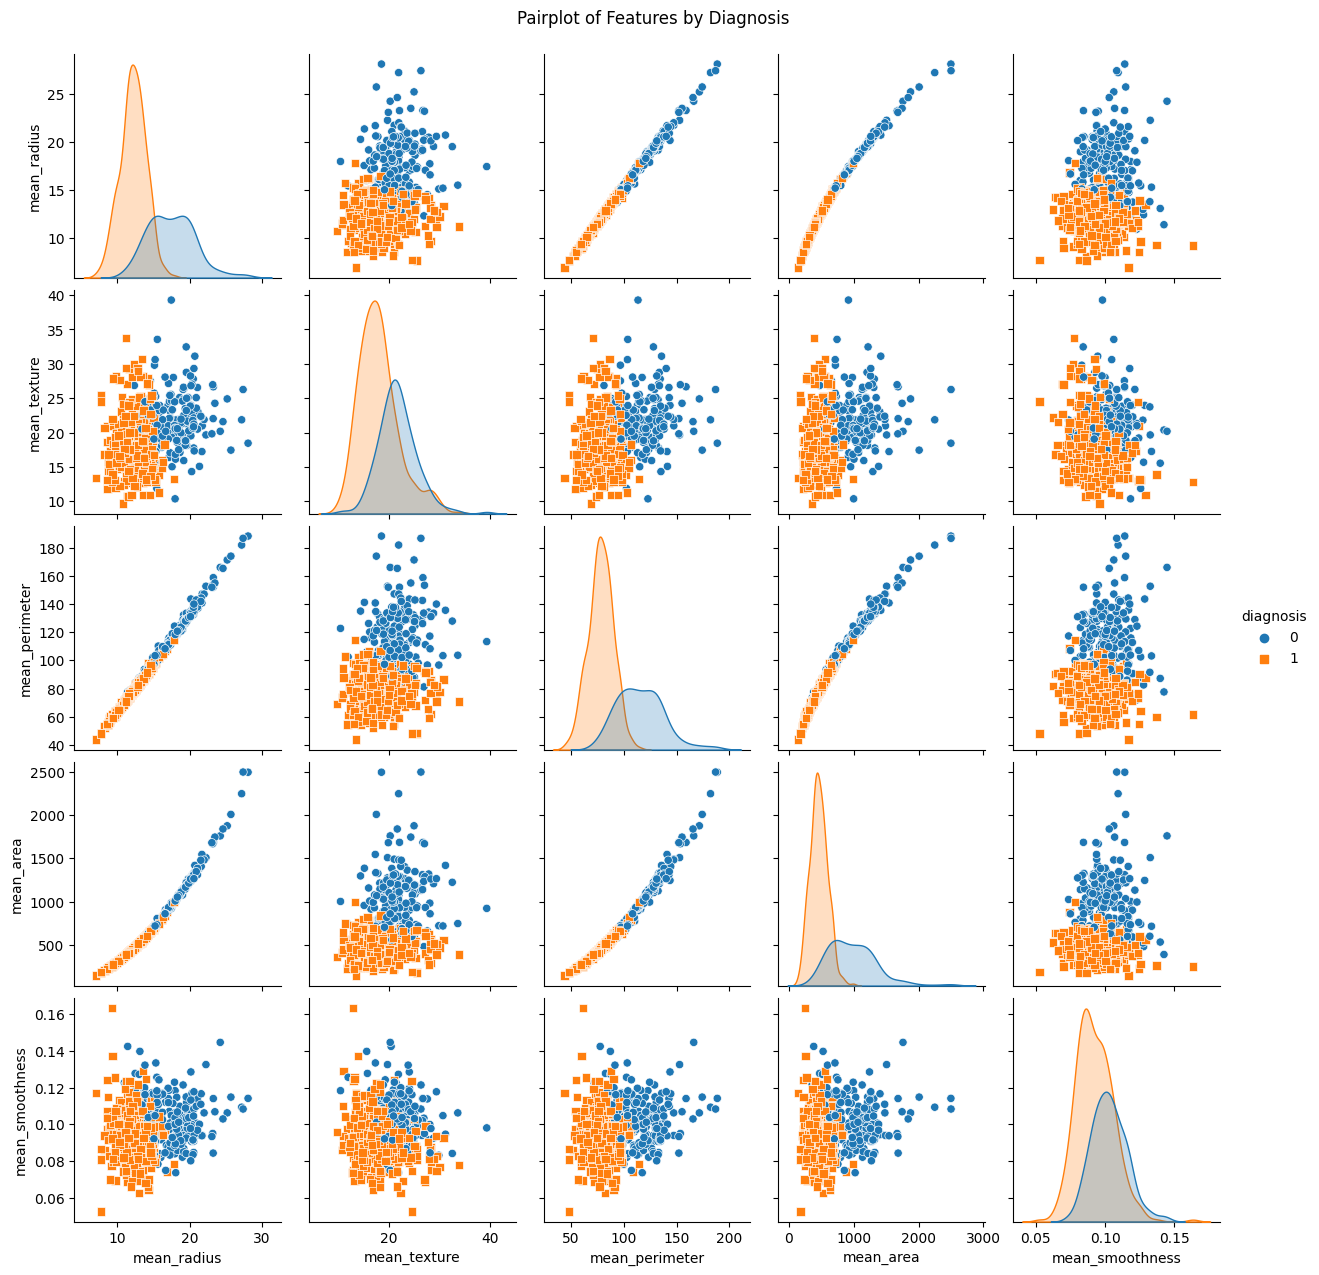

In [10]:
sns.pairplot(df, hue='diagnosis', markers=['o', 's'], diag_kind='kde')
plt.suptitle("Pairplot of Features by Diagnosis", y=1.02)
plt.show()

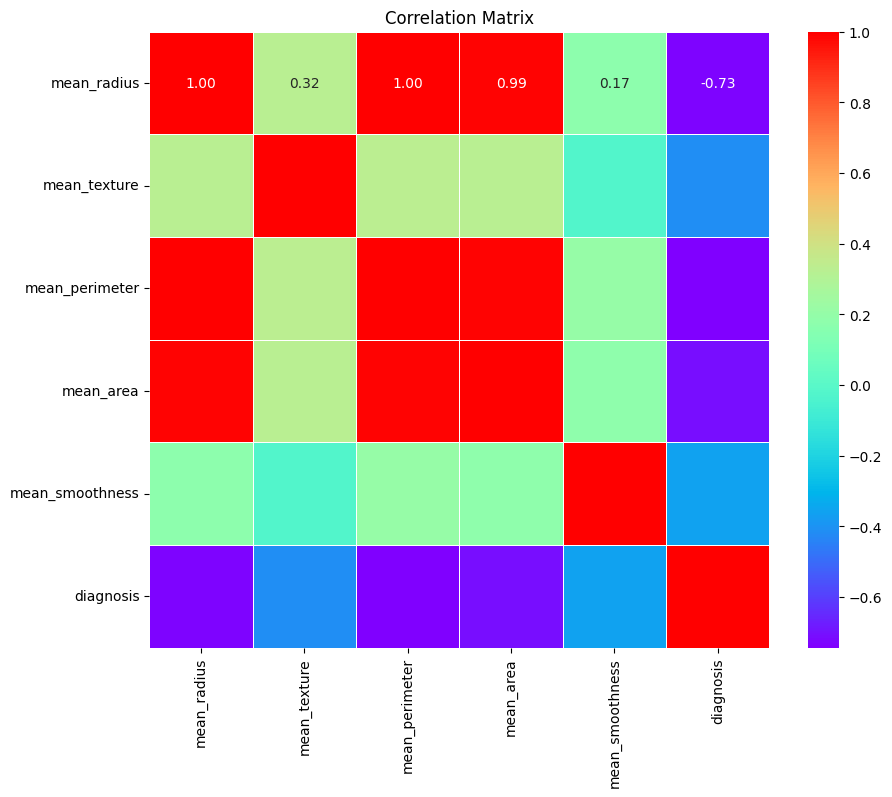

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

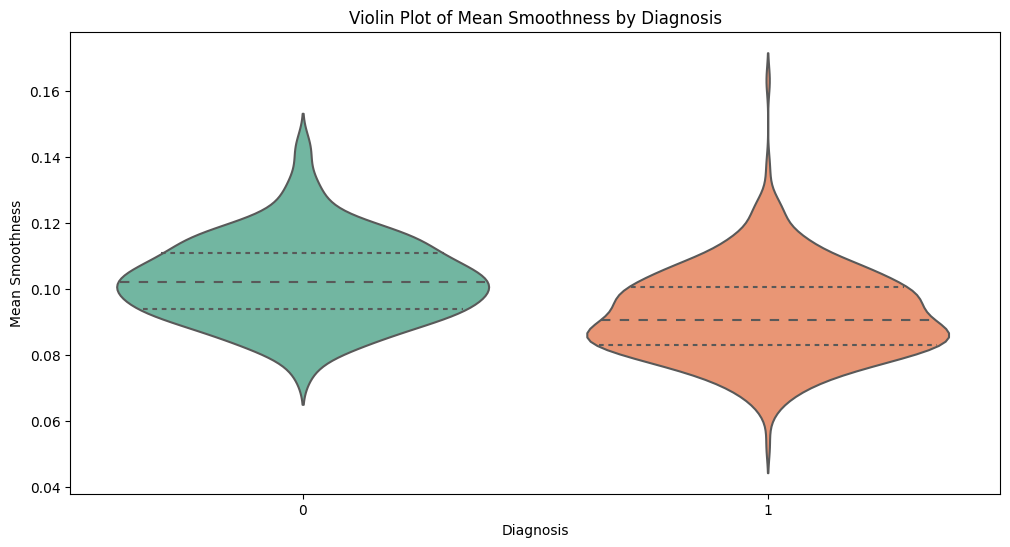

In [12]:
# Violin plot of 'mean_smoothness' by Diagnosis
plt.figure(figsize=(12, 6))
sns.violinplot(x='diagnosis', y='mean_smoothness', data=df, palette='Set2', inner='quartile')
plt.title('Violin Plot of Mean Smoothness by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Smoothness')
plt.show()


# Splitting the Data

In [13]:
from sklearn.model_selection import train_test_split
X=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

Scaling the data

In [15]:
X_train_scaled=StandardScaler().fit_transform(X_train)
X_test_scaled=StandardScaler().fit_transform(X_test)

Model fitting

In [16]:
lr_model=LogisticRegression()
lr_model.fit(X_train_scaled,y_train)

LogisticRegression()

Model Prediction

In [17]:
lr_y_pred=lr_model.predict(X_test_scaled)
print("Accuracy:{0:.2f}%".format(100*accuracy_score(lr_y_pred, y_test)))
print("F1 Score:{0:.2f}".format(f1_score(y_test,lr_y_pred)))
print(confusion_matrix(y_test,lr_y_pred))
print(classification_report(y_test,lr_y_pred))

Accuracy:96.49%
F1 Score:0.97
[[39  4]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



# Support Vector Machines

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

Model Fitting

In [19]:
svm_model=SVC(kernel='linear')
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

Model Prediction

In [20]:
svm_y_pred=svm_model.predict(X_test)
print("Accuracy:{0:.2f}%".format(100*accuracy_score(svm_y_pred, y_test)))
print("F1 Score:{0:.2f}".format(f1_score(y_test,svm_y_pred)))
print(confusion_matrix(y_test,svm_y_pred))
print(classification_report(y_test,svm_y_pred))

Accuracy:93.86%
F1 Score:0.95
[[40  3]
 [ 4 67]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.94      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



# Artificial Neural Networks

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Model Fitting

In [33]:
ann_model = Sequential()
ann_model.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
12/12 [==============================] - 1s 16ms/step - loss: 9.3492 - accuracy: 0.6319 - val_loss: 2.9817 - val_accuracy: 0.3626
Epoch 2/10
12/12 [==============================] - 0s 5ms/step - loss: 3.1201 - accuracy: 0.3736 - val_loss: 1.0466 - val_accuracy: 0.6374
Epoch 3/10
12/12 [==============================] - 0s 4ms/step - loss: 1.2813 - accuracy: 0.4698 - val_loss: 0.9663 - val_accuracy: 0.3626
Epoch 4/10
12/12 [==============================] - 0s 4ms/step - loss: 0.8338 - accuracy: 0.5027 - val_loss: 0.9416 - val_accuracy: 0.3626
Epoch 5/10
12/12 [==============================] - 0s 4ms/step - loss: 0.7053 - accuracy: 0.5549 - val_loss: 0.6393 - val_accuracy: 0.4396
Epoch 6/10
12/12 [==============================] - 0s 4ms/step - loss: 0.6287 - accuracy: 0.5852 - val_loss: 0.6187 - val_accuracy: 0.4945
Epoch 7/10
12/12 [==============================] - 0s 5ms/step - loss: 0.5569 - accuracy: 0.8132 - val_loss: 0.5302 - val_accuracy: 0.8462
Epoch 8/10
12/12 [=

In [35]:
y_pred = ann_model.predict(X_test)
ann_y_pred = (y_pred > 0.5).astype(int)

4/4 [==============================] - 0s 0s/step


In [36]:
print("Accuracy:{0:.2f}%".format(100*accuracy_score(ann_y_pred, y_test)))
print("F1 Score:{0:.2f}".format(f1_score(y_test,ann_y_pred)))
print(confusion_matrix(y_test,ann_y_pred))
print(classification_report(y_test,ann_y_pred))

Accuracy:92.98%
F1 Score:0.95
[[35  8]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        43
           1       0.90      1.00      0.95        71

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.92       114
weighted avg       0.94      0.93      0.93       114



# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

Model Fitting

In [38]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

Model Prediction

In [39]:
rf_y_pred=rf_model.predict(X_test)

Model Performance

In [40]:
print("Accuracy:{0:.2f}%".format(100*accuracy_score(rf_y_pred, y_test)))
print("F1 Score:{0:.2f}".format(f1_score(y_test,rf_y_pred)))
print(confusion_matrix(y_test,rf_y_pred))
print(classification_report(y_test,rf_y_pred))

Accuracy:94.74%
F1 Score:0.96
[[41  2]
 [ 4 67]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.97      0.94      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



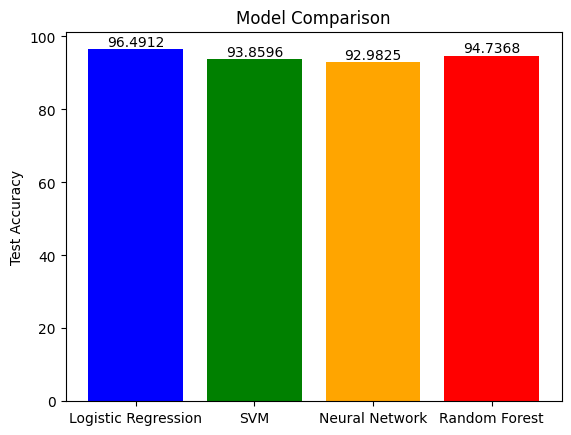

In [41]:
import matplotlib.pyplot as plt
import numpy as np
model_names = ['Logistic Regression', 'SVM', 'Neural Network','Random Forest']
test_accuracies =[100*accuracy_score(lr_y_pred, y_test),
                   100*accuracy_score(svm_y_pred, y_test),
                   100*accuracy_score(ann_y_pred, y_test),
                   100*accuracy_score(rf_y_pred, y_test)
                   ]
fig, ax = plt.subplots()
bars = ax.bar(model_names, test_accuracies, color=['blue', 'green', 'orange','red'])
ax.set_ylabel('Test Accuracy')
ax.set_title('Model Comparison')
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')
plt.show()

We can see that the accuracy score and f1-score of Logistic Regression is better when compared to other models,it can be used for user data prediction

In [42]:
import pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(lr_model, model_file)